In [1]:
!pip install tensorflow 

In [2]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10

# load cifar10 data

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

import numpy as np

x = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])

# I will split the data into 80% training 20 % testing 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
#stratify=y ensures that the train and test sets have the same class proportions (like 0s and 1s) as the original dataset.
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(48000, 32, 32, 3)
(12000, 32, 32, 3)
(48000, 1)
(12000, 1)


In [3]:
x_train = x_train.astype(float) / 255.0
x_test  = x_test.astype(float) / 255.0

In [4]:
x_train

array([[[[0.28235294, 0.29019608, 0.24313725],
         [0.22352941, 0.23921569, 0.2       ],
         [0.2745098 , 0.26666667, 0.23921569],
         ...,
         [0.32156863, 0.4       , 0.31372549],
         [0.29019608, 0.34901961, 0.27843137],
         [0.30980392, 0.37647059, 0.30196078]],

        [[0.25098039, 0.27058824, 0.21568627],
         [0.21568627, 0.24313725, 0.18823529],
         [0.2627451 , 0.25098039, 0.20392157],
         ...,
         [0.26666667, 0.34117647, 0.23921569],
         [0.31372549, 0.36862745, 0.27843137],
         [0.30980392, 0.36470588, 0.27058824]],

        [[0.29803922, 0.31764706, 0.25098039],
         [0.27058824, 0.29019608, 0.22745098],
         [0.29411765, 0.27058824, 0.2       ],
         ...,
         [0.35294118, 0.38823529, 0.29019608],
         [0.4       , 0.41960784, 0.32156863],
         [0.36862745, 0.38823529, 0.29019608]],

        ...,

        [[0.42352941, 0.38039216, 0.28627451],
         [0.38823529, 0.38431373, 0.32156863]

In [5]:
x_train[0,0][0][-1]

np.float64(0.24313725490196078)

In [6]:
y_train

array([[6],
       [6],
       [3],
       ...,
       [4],
       [7],
       [1]], dtype=uint8)

In [7]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


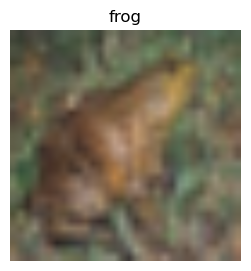

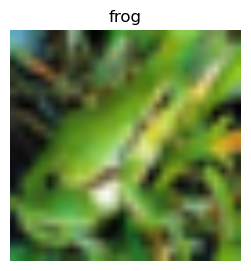

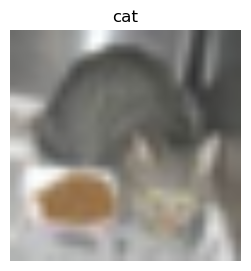

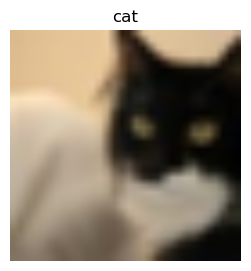

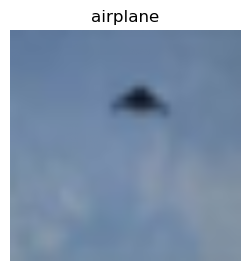

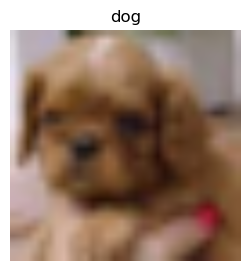

In [8]:
## plotting the imaage
import matplotlib.pyplot as plt
import cv2
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for i in range(6):
    plt.figure(figsize=(5,3))
    plt.imshow(cv2.resize(x_train[i], (256, 256))) # for better clarity imaage
    plt.title(class_names[y_train[i][0]]) # y_train[0] = 6, 6 is a 1d array, 6[0] , takes the only element from the array
    plt.axis('off')
    plt.show()
    

# Task 2

In [9]:
from tensorflow.keras.models import Sequential # Sequential is model building class that helps create neural network by adding layers after layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
# Conv2D, its a 2d Convolution layer. It detect features like edges, textures, shapes, patterns.
# MaxPooling2D, Reduces the size of the feature maps. it helps remove noise, prevent overfitting, make the model faster.
# Dropout, Turns OFF some neurons randomly during training, prevents overfitting, makes the model more general (better for unseen data).
# Flatten, converts the 2D feature maps (from Conv layers) into a 1D vector, required before feeding into Dense (fully connected layers).
# Dense, A classic fully connected neural network layer. Used at the end of CNN for classification.

## Feature map is a single version of the image.


# CNN Model
model = Sequential()
# padding='same', This means, preserves the input size. Output image stays the same width and height. 

# Block 1 - First Convolution block
model.add(Conv2D(32, (3,3), activation='relu', padding='same',
                 input_shape=(32,32,3))) # 32 height, 32 width
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

# 32 - It means this layer will learn 32 filters. So after this layer, my image turns into 32 feature maps. In simple words, it means 32 different versions of the image
# (3,3) - This means each filter is 3×3 pixels.
# Relu activation - ReLU = Rectified Linear Unit, It makes the model learns faster, avoid negative values, handle non-linear patterns.
# padding='same', This means, preserves the input size. Output image stays the same width and height. So input (32×32x3) and output is (32x32x32),
# here the last 32 means feature map. The CNN has created 32 different versions of the image. Each verison is called a feature map.
# input_shape=(32,32,3), it tells the model, each image is 32 pixels high, 32 pixels wide, 3 channels (RGB), RGB - (Red, Green, Blue)

# MaxPooling2D((2,2)) = Reduces the image size by taking the strongest (max) value from each 2×2 area. 2 height x 2 width.
# Dropout(0.25) = Turns OFF 25% of neurons randomly during training to prevent overfitting.

# Block 2
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

# Block 3
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output Layer (10 classes in CIFAR-10)
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Input Image
    
Conv2D (layer 1)
    
ReLU activation
    
MaxPooling2D
    
Dropout
    
Conv2D (layer 2)
    
...
    
Flatten
    
Dense (FC)
    
Softmax Output


Block 1
The input to Block 1 is an image of shape 32 × 32 × 3, where 32×32 represents the height and width, and 3 represents the RGB color channels. After passing through Conv2D(32 filters), the output becomes 32 × 32 × 32, meaning the height and width stay the same while the depth becomes 32 feature maps. Then, MaxPooling2D(2×2) reduces the height and width by half(32 divided by 2), giving 16 × 16 × 32. Finally, Dropout(0.25) does not change the shape, so the final output of Block 1 remains 16 × 16 × 32.

Block 2
Block 2 takes the output of Block 1, which is 16 × 16 × 32, as its input. After applying Conv2D with 64 filters, the height and width remain the same while the depth increases to 64 feature maps, because of Conv2D(64), giving an output of 16 × 16 × 64. Next, MaxPooling2D(2×2) reduces the height and width by half( 16/ 2), resulting in 8 × 8 × 64. Finally, Dropout(0.25) keeps the same shape, so the final output of Block 2 remains 8 × 8 × 64.

Block 3
Block 3 receives the output from Block 2, which has the shape 8 × 8 × 64. After applying Conv2D with 128 filters, the height and width remain the same while the depth increases to 128 feature maps, resulting in an output of 8 × 8 × 128. Then, MaxPooling2D(2×2) reduces the height and width by half, producing 4 × 4 × 128. Finally, Dropout(0.25) does not change the shape, so the final output of Block 3 remains 4 × 4 × 128.

Flatten + Dense + Dropout Summary
After Block 3, the feature maps have the shape 4 × 4 × 128. The Flatten() layer converts this 3-dimensional output into a 1-dimensional vector of 2048 values (because 4 × 4 × 128 = 2048). This flattened vector is then passed into a Dense layer with 128 neurons, which learns high-level patterns by combining all extracted features from earlier convolution blocks. The ReLU activation helps the model capture non-linear relationships and learn meaningful representations. A Dropout(0.5) layer follows, which randomly turns off 50% of the neurons during training to prevent overfitting. The output of this Dense block is a vector of size 128, representing the final abstract features learned before classification.

Output Layer Summary
The final Dense layer has 10 neurons, because CIFAR-10 contains 10 different classes. This layer uses the softmax activation function, which converts the 10 output values into probabilities that sum up to 1. Each probability represents how confident the model is that the input image belongs to that class. The class with the highest probability becomes the model’s prediction.

Compile Step Summary
The model is compiled using the Adam optimizer, a widely used optimization algorithm that adjusts learning rates automatically during training. The loss function used is sparse_categorical_crossentropy, which is appropriate for multi-class classification when the labels are integers (0–9). The model is also set to track accuracy during training, so we can monitor how well it learns to classify the images over time.

In [10]:
a = 4 * 4 * 128
print(a)

2048


In [11]:
# training the model

cnn_model = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 106ms/step - accuracy: 0.3610 - loss: 1.7311 - val_accuracy: 0.5078 - val_loss: 1.3785
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 73s 97ms/step - accuracy: 0.5045 - loss: 1.3724 - val_accuracy: 0.5991 - val_loss: 1.1258
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 78s 104ms/step - accuracy: 0.5690 - loss: 1.2166 - val_accuracy: 0.6453 - val_loss: 1.0233
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 104ms/step - accuracy: 0.6033 - loss: 1.1222 - val_accuracy: 0.6728 - val_loss: 0.9439
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 218s 291ms/step - accuracy: 0.6311 - loss: 1.0454 - val_accuracy: 0.6914 - val_loss: 0.8857
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 105ms/step - accuracy: 0.6517 - loss: 0.9913 - val_accuracy: 0.7013 - val_loss: 0.8434
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 106ms/step - accuracy: 0.6695 - loss: 0.9447 - val_accuracy: 0.7258 - val_loss: 0.7830
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 105ms/step - accuracy: 0.6799 - loss: 0

In [12]:
# checking scores
cnn_model.history['accuracy']
cnn_model.history['val_accuracy']

[0.5078333616256714,
 0.5990833044052124,
 0.6452500224113464,
 0.6728333234786987,
 0.6914166808128357,
 0.7013333439826965,
 0.7257500290870667,
 0.706166684627533,
 0.7465000152587891,
 0.7412499785423279,
 0.7528333067893982,
 0.7574166655540466,
 0.7549166679382324,
 0.762416660785675,
 0.7628333568572998]

# Above scores show my model learning steadily

In [13]:
print('Final training accuracy:',  cnn_model.history['accuracy'][-1])
print('Final validation accuracy:', cnn_model.history['val_accuracy'][-1])

Final training accuracy: 0.7276458144187927
Final validation accuracy: 0.7628333568572998


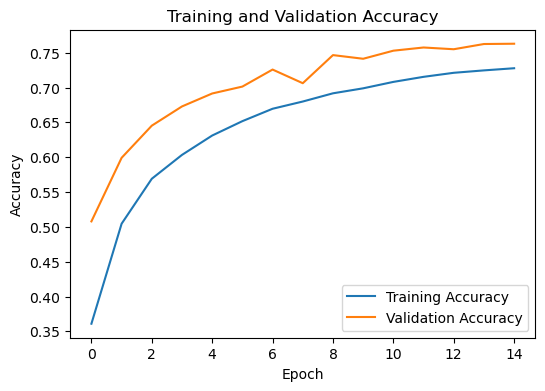

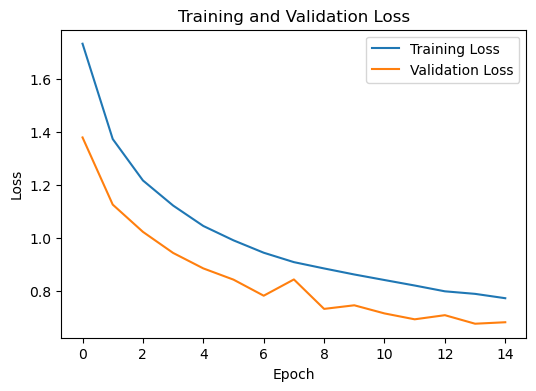

In [14]:
import matplotlib.pyplot as plt

# Accuracy curves
plt.figure(figsize=(6,4))
plt.plot(cnn_model.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss curves
plt.figure(figsize=(6,4))
plt.plot(cnn_model.history['loss'], label='Training Loss')
plt.plot(cnn_model.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

The training and validation accuracy curves show a steady improvement across the 15 epochs, with training accuracy rising from around 35% to 72%, and validation accuracy reaching about 76%. The validation accuracy remains consistently above the training accuracy, indicating that the model is generalizing well and not overfitting. Similarly, both training and validation loss decrease over time, following a smooth downward trend. The validation loss stays slightly lower than the training loss, confirming stable learning. Overall, the CNN model successfully learned meaningful features from the CIFAR-10 dataset and achieved good performance.

# Task 3

In [16]:
# Evaluate the model on the test set and calculate accuracy
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

Test Loss: 0.6831591129302979
Test Accuracy: 0.7628333568572998


In [17]:
# generating predictions
y_pred = model.predict(x_test)

375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step


In [22]:
y_pred

array([[1.51143246e-03, 2.07459161e-04, 2.53179553e-03, ...,
        4.97594615e-03, 5.87008544e-04, 6.65926927e-05],
       [1.94414042e-06, 1.89433706e-07, 1.45961307e-02, ...,
        6.11472991e-04, 1.82946758e-06, 2.09301902e-06],
       [2.53745611e-06, 1.45528911e-09, 3.21284682e-02, ...,
        1.16072729e-01, 5.91068208e-08, 2.85959430e-07],
       ...,
       [4.20643650e-02, 1.00069665e-05, 8.21119454e-03, ...,
        1.01736587e-05, 9.49033558e-01, 7.17453804e-05],
       [1.08881890e-04, 2.24788721e-08, 9.17768121e-01, ...,
        7.85861339e-04, 1.61529090e-06, 4.48291814e-07],
       [1.61050245e-01, 3.42679322e-02, 2.09551845e-02, ...,
        1.33748096e-03, 7.71725595e-01, 3.54312547e-03]], dtype=float32)

In [20]:
# converting probabilities to clas labels
y_pred_labels = y_pred.argmax(axis=1)

In [21]:
y_pred_labels

array([5, 4, 5, ..., 8, 2, 8])

# y_pred.argmax coverted 2d array to 1d array

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

cm2 = confusion_matrix(y_test, y_pred_labels)
cr2 = classification_report(y_test, y_pred_labels)

print(f'confusion_matrix is {cm2}')
print(f'classification_report is {cr2}')

confusion_matrix is [[ 973   10   39    9   50    5    5   15   76   18]
 [  18 1062    8    5    5    4    6    4   36   52]
 [  68    3  730   41  192   50   56   38   17    5]
 [  22    2   66  673  130  166   73   36   24    8]
 [  19    0   37   31 1020   18   19   41   14    1]
 [   9    2   54  220  104  717   24   58    7    5]
 [   7    2   50   48   90   26  961    4    9    3]
 [   9    4   35   41  113   43    5  942    2    6]
 [  42   14    8    6   10    0    4    6 1100   10]
 [  48   85    8   14   15    5   10   10   29  976]]
classification_report is               precision    recall  f1-score   support

           0       0.80      0.81      0.81      1200
           1       0.90      0.89      0.89      1200
           2       0.71      0.61      0.65      1200
           3       0.62      0.56      0.59      1200
           4       0.59      0.85      0.70      1200
           5       0.69      0.60      0.64      1200
           6       0.83      0.80      0.81  

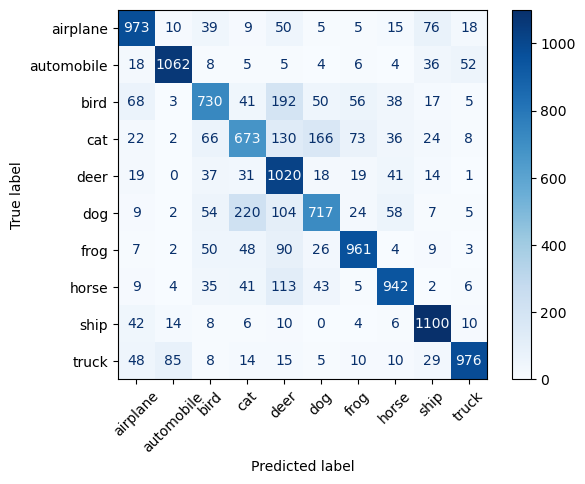

In [24]:
# displaying the confusion matrix of svm model the result was best among all of my other models
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_labels) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= class_names)
disp.plot(cmap='Blues', xticks_rotation=45, values_format='d')
plt.show()

The confusion matrix above shows how well the CNN model correctly classified each CIFAR-10 category. The darker blue diagonal cells represent the number of correct predictions for each class, showing strong performance for categories like ship (1100 correct), deer (1020 correct), truck (976 correct), and automobile (1062 correct). Lighter cells off the diagonal indicate misclassifications—for example, some dogs were confused with cats, and some birds were confused with airplanes or cats. Overall, the model performs well on most classes, with the darkest diagonal indicating high accuracy, and only a few noticeable confusions across visually similar categories.

In [30]:
# creating a function to save the cnn model

def store(x):
    model = Sequential()
# padding='same', This means, preserves the input size. Output image stays the same width and height. 

# Block 1 - First Convolution block
    model.add(Conv2D(32, (3,3), activation='relu', padding='same',
                 input_shape=(32,32,3))) # 32 height, 32 width
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.25))

# 32 - It means this layer will learn 32 filters. So after this layer, my image turns into 32 feature maps. In simple words, it means 32 different versions of the image
# (3,3) - This means each filter is 3×3 pixels.
# Relu activation - ReLU = Rectified Linear Unit, It makes the model learns faster, avoid negative values, handle non-linear patterns.
# padding='same', This means, preserves the input size. Output image stays the same width and height. So input (32×32x3) and output is (32x32x32),
# here the last 32 means feature map. The CNN has created 32 different versions of the image. Each verison is called a feature map.
# input_shape=(32,32,3), it tells the model, each image is 32 pixels high, 32 pixels wide, 3 channels (RGB), RGB - (Red, Green, Blue)

# MaxPooling2D((2,2)) = Reduces the image size by taking the strongest (max) value from each 2×2 area. 2 height x 2 width.
# Dropout(0.25) = Turns OFF 25% of neurons randomly during training to prevent overfitting.

# Block 2
    model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.25))

# Block 3
    model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.25))

# Flatten and Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

# Output Layer (10 classes in CIFAR-10)
    model.add(Dense(10, activation='softmax'))

# Compile the model
    model.compile(optimizer= x,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
    return model

In [32]:
# training with SGD and RMSprop model and comparing with Adam
from tensorflow.keras.optimizers import SGD, RMSprop, Adam

results = {}

# SGD
model_sgd = store(SGD())
history_sgd = model_sgd.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=0
)
results['SGD'] = history_sgd.history['val_accuracy'][-1]

# RMSprop
model_rms = store(RMSprop())
history_rms = model_rms.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=0
)
results['RMSprop'] = history_rms.history['val_accuracy'][-1]

# Adam
model_adam = store(Adam())
history_adam = model_adam.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=0
)
results['Adam'] = history_adam.history['val_accuracy'][-1]

results


{'SGD': 0.5096666812896729,
 'RMSprop': 0.7269166707992554,
 'Adam': 0.734333336353302}

Adam performed best among SGD, RMSprop, and Adam, so it was selected for the final model.

To improve the performance of the CNN model, I experimented with different optimization algorithms instead of using only the default Adam optimizer. I trained the same CNN architecture using three different optimizers: SGD, RMSProp, and Adam, while keeping all other parameters (epochs, batch size, architecture) constant.
This allowed me to compare how each optimizer affects convergence speed and validation accuracy. SGD showed slower learning and lower accuracy, RMSProp improved stability, and Adam achieved the highest validation accuracy. Based on this comparison, Adam was selected as the best optimizer for the final model.

In [38]:
# coverting the dictionary into df
import pandas as pd
df_score = pd.DataFrame.from_dict(results,orient='index', columns=['Scores'])
print(df_score)

           Scores
SGD      0.509667
RMSprop  0.726917
Adam     0.734333
